## Observations and Insights 

In [1]:
# Import Numpy for calculations and matplotlib for charting
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_scc_data = pd.merge(mouse_metadata, study_results)
# Display the data table for preview
combined_scc_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice.
combined_scc_data["Mouse ID"].count()

1893

In [4]:
#define Mouse ID and Point 
mouse_id_df=['Mouse ID']
time_point_df=['Timepoint']

In [5]:
## Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicateRowsDF = combined_scc_data[combined_scc_data.duplicated(['Mouse ID', 'Timepoint'])]
print(duplicateRowsDF)

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
909     g989     Propriva  Female          21          26          0   
911     g989     Propriva  Female          21          26          5   
913     g989     Propriva  Female          21          26         10   
915     g989     Propriva  Female          21          26         15   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
909           45.000000                 0  
911           47.570392                 0  
913           49.880528                 0  
915           53.442020                 0  
917           54.657650                 1  


In [41]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicateRowsDF = combined_scc_data[combined_scc_data.duplicated(['Mouse ID', 'Timepoint'])]
print(duplicateRowsDF)

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
909     g989     Propriva  Female          21          26          0   
911     g989     Propriva  Female          21          26          5   
913     g989     Propriva  Female          21          26         10   
915     g989     Propriva  Female          21          26         15   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
909           45.000000                 0  
911           47.570392                 0  
913           49.880528                 0  
915           53.442020                 0  
917           54.657650                 1  


In [49]:
# Checking the number of mice in the clean DataFrame.
#clean out g989
clean_data=combined_scc_data.loc[combined_scc_data['Mouse ID']!= "g989"]
#change code to clean data

In [52]:
len(clean_data['Mouse ID'].unique())

248

## Summary Statistics

In [53]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drug_summary= clean_data.groupby('Drug Regimen').agg(\
 
     #mean of Tumor Volume Column
     Tumor_Mean=('Tumor Volume (mm3)', np.mean),\
     #median of Tumor Volume Column
     Tumor_Median=('Tumor Volume (mm3)', np.median),\
     #variance of the Tumor Volume Column
     Tumor_Variance=('Tumor Volume (mm3)', np.var),\
     #STD of Tumor Volume Column
     Tumor_Std=('Tumor Volume (mm3)', np.std),\
     #SEM of Tumor Volume Column
     Tumor_SEM=('Tumor Volume (mm3)', st.sem),\
).round(3)
#display the summary statistics
drug_summary
    
# This method is the most straighforward, creating multiple series and putting them all together at the end.


C:\Users\Anna Schaefer\anaconda3\lib\site-packages\numpy\core\_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\Anna Schaefer\anaconda3\lib\site-packages\numpy\core\_methods.py:186: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
C:\Users\Anna Schaefer\anaconda3\lib\site-packages\numpy\core\_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,Tumor_Mean,Tumor_Median,Tumor_Variance,Tumor_Std,Tumor_SEM
Drug Regimen,,,,,
Capomulin,40.676,41.558,24.948,4.995,0.329
Ceftamin,52.591,51.776,39.290,6.268,0.470
Infubinol,52.885,51.821,43.129,6.567,0.492
Ketapril,55.236,53.699,68.554,8.280,0.604
Naftisol,54.332,52.509,66.173,8.135,0.596
Placebo,54.034,52.289,61.168,7.821,0.581
Propriva,52.321,50.446,43.852,6.622,0.544
Ramicane,40.217,40.673,23.487,4.846,0.321
Stelasyn,54.233,52.432,59.451,7.710,0.573


## Bar and Pie Charts

In [10]:
#check data points
#regimen_data_points = duplicateRowsDF.groupby(["Drug Regimen"]).count()["Mouse ID"]
#regimen_data_points

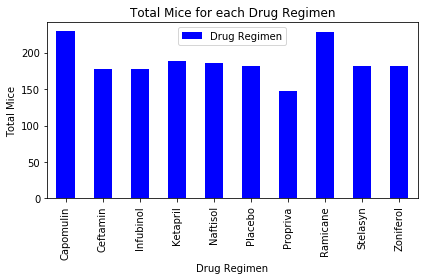

In [54]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

#create the dataframe by grouping Drug Regimen
total_mice_regimen=clean_data.groupby('Drug Regimen')


#create the dataframe counting the total number of mice for each drug regimen
total_regimen_count=pd.DataFrame(total_mice_regimen['Drug Regimen'].count())

                                                        
#create the bar plot
total_plot=total_regimen_count.plot(kind='bar', title="Total Mice for each Drug Regimen", color="blue")

#set the x/y-labels
total_plot.set_xlabel("Drug Regimen")
total_plot.set_ylabel("Total Mice")
plt.tight_layout()

plt.show()


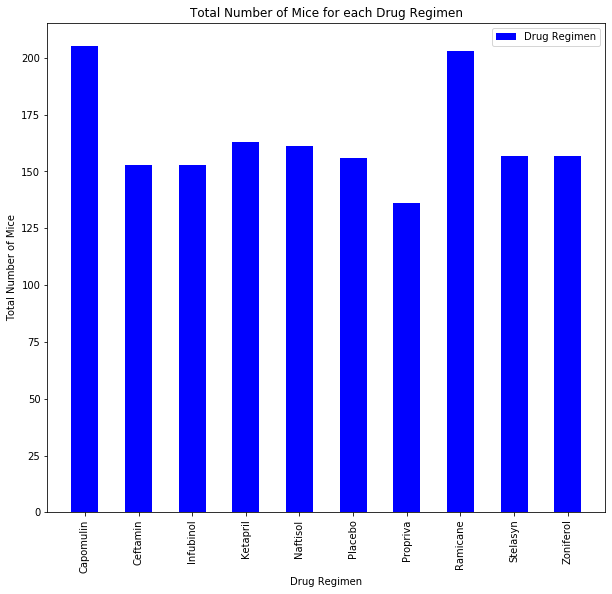

In [17]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
#set xaxis and tick loc
x_axis=np.arange(len(total_regimen_count))
tick_location= [value for value in x_axis]

#create a list indicting where to write x-labels and set figure size 
plt.figure(figsize=(10,9))
plt.bar(x_axis, total_regimen_count["Drug Regimen"], color='blue', align="center", width=0.5)
plt.xticks(tick_location, list(total_regimen_count.index), rotation="vertical")

#set x and y limits
plt.xlim(-0.7, len(x_axis)-0.3)
plt.ylim(0, max(total_regimen_count["Drug Regimen"])*1.05)

#set title/labels
plt.title("Total Number of Mice for each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Number of Mice")

column_name=["Drug Regimen"]
plt.legend(column_name,loc="best")


plt.show()


In [55]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
#create groupby for Sex
sex_group=clean_data.groupby('Sex')

#create dataframe, count by gender
sex_group_count=pd.DataFrame(sex_group['Sex'].count())

sex_group_count.head()

,Sex
Sex,
Female,922
Male,958


(-1.1171944866462706,
 1.1057967798535038,
 -1.110919364943666,
 1.107907705791865)

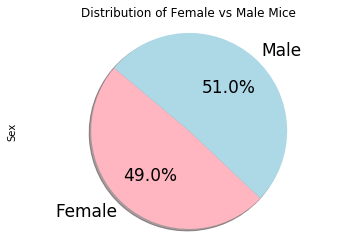

In [56]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_group_count.plot(kind='pie', y='Sex', \
                    title="Distribution of Female vs Male Mice",\
                    startangle=140, autopct='%1.1f%%', shadow=True,\
                    fontsize=17, colors=["lightpink", "lightblue"],\
                    legend=False)
#make axis equal
plt.axis("equal")


## Quartiles, Outliers and Boxplots

In [57]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
four_regimens= clean_data[clean_data["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
# Start by getting the last (greatest) timepoint for each mouse
four_regimens= four_regimens.sort_values(["Timepoint"], ascending=True)

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
four_regimens_data=four_regimens[["Drug Regimen", "Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]

four_regimens_data

,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3)
0,Ramicane,k403,0,45.000000
1391,Infubinol,q132,0,45.000000
195,Capomulin,i738,0,45.000000
205,Ramicane,a520,0,45.000000
1370,Ceftamin,p438,0,45.000000
...,...,...,...,...
350,Capomulin,v923,45,40.658124
144,Capomulin,m957,45,33.329098
337,Capomulin,j119,45,38.125164
59,Ramicane,s508,45,30.276232


In [58]:
len(clean_data['Mouse ID'].unique())

248

In [63]:
# Put treatments into a list for for loop (and later for plot labels)
top_4_drugs= ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_data=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = clean_data.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)


    # Locate the rows which contain mice on each drug and get the tumor volumes
for drug in top_4_drugs:
    volume=clean_data.loc[clean_data['Drug Regimen']== drug, 'Tumor Volume (mm3)'] 
    tumor_data.append(volume)    
    

    # add subset 
    
    
    # Determine outliers using upper and lower bounds


#print out list of potential outliers. Infubinol is the only one that has an outlier 36.32

KeyError: 0.25

In [37]:
#tumor_data[1]

{'whiskers': [<matplotlib.lines.Line2D at 0x233cad07348>,
 'caps': [<matplotlib.lines.Line2D at 0x233cae66408>,
 'boxes': [<matplotlib.lines.Line2D at 0x233cb675e08>,
 'medians': [<matplotlib.lines.Line2D at 0x233cad2af08>,
 'fliers': [<matplotlib.lines.Line2D at 0x233cb5e1e08>,
 'means': []}

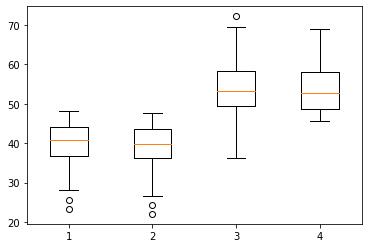

In [40]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(tumor_data)

## Line and Scatter Plots

In [ ]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
